Logistic regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [2]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, bias, verbose, lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    def fit(self, X, y, X_val, y_val): 
        if self.bias == True:
          bias = np.ones((X.shape[0], 1))
          X = np.hstack((bias, X))
          bias = np.ones((X_val.shape[0], 1))
          X_val = np.hstack((bias, X_val))
          self.theta = np.zeros(X.shape[1])
          self.theta = self.theta.reshape(X.shape[1], 1)
          for i in range(self.num_iter):
              pred = self._logistic_hypothesis(X)
              pred_val = self._logistic_hypothesis(X_val)
              self._gradient_descent(X, y)
              loss = self._loss_func(pred, y)
              self.loss = np.append(self.loss, loss)
              loss_val = self._loss_func(pred_val, y_val)
              self.val_loss = np.append(self.val_loss, loss_val)
              if self.verbose == True:
                  print('{}回目の学習の損失は{}'.format(i,loss))

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
     
    def _sigmoid(self,y):
        """sigmoid関数"""
        return 1 / (1 + np.exp(-y))
        
    def _logistic_hypothesis(self, X):
        """仮定関数"""
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
       
    def predict(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
        
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss

In [3]:
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001,bias=True,verbose=True,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

0回目の学習の損失は0.693147180599618
1回目の学習の損失は0.6930837177242185
2回目の学習の損失は0.6930203057352021
3回目の学習の損失は0.6929569438034299
4回目の学習の損失は0.692893631116275
5回目の学習の損失は0.6928303668772894
6回目の学習の損失は0.6927671503058862
7回目の学習の損失は0.6927039806370185
8回目の学習の損失は0.6926408571208741
9回目の学習の損失は0.6925777790225678
10回目の学習の損失は0.692514745621846
11回目の学習の損失は0.6924517562127939
12回目の学習の損失は0.6923888101035509
13回目の学習の損失は0.6923259066160292
14回目の学習の損失は0.6922630450856387
15回目の学習の損失は0.692200224861019
16回目の学習の損失は0.6921374453037756
17回目の学習の損失は0.6920747057882205
18回目の学習の損失は0.6920120057011181
19回目の学習の損失は0.6919493444414392
20回目の学習の損失は0.691886721420116
21回目の学習の損失は0.6918241360598031
22回目の学習の損失は0.6917615877946454
23回目の学習の損失は0.6916990760700468
24回目の学習の損失は0.6916366003424474
25回目の学習の損失は0.6915741600791028
26回目の学習の損失は0.6915117547578682
27回目の学習の損失は0.6914493838669866
28回目の学習の損失は0.6913870469048834
29回目の学習の損失は0.6913247433799603
30回目の学習の損失は0.6912624728103998
31回目の学習の損失は0.6912002347239666
32回目の学習の損失は0.6911380286578203
33回目の学習の損失は0.691075854158

In [4]:
slr.predict(X_test)

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

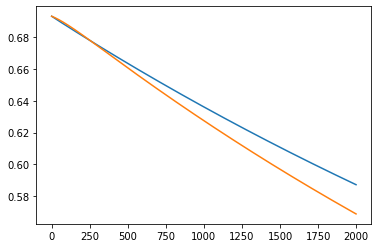

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)

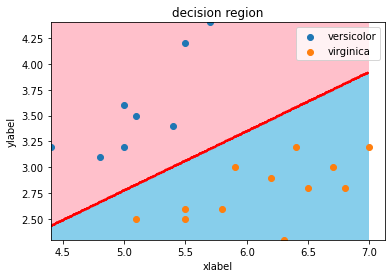

In [6]:
from matplotlib.colors import ListedColormap
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')
    plt.contourf(mesh_f0, 
                 mesh_f1, 
                 y_pred,
                 cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='versicolor')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='virginica')
    plt.legend()
    plt.show()

decision_region(X_test,y_test,slr)